# Los Angeles County Disparities in Healthcare Accessibility -  Twitter Analysis


Los Angeles County is one of the largest and most populated counties in the United States. Having such an expansive population comes with great qualities including variety of cultures, people and backgrounds. On the other hand, the county is experiencing setbacks in many social aspects including education, homelessness and healthcare. Lack of accessibility to medical services is one of the biggest drawbacks that thousands of individuals in LA are currently suffering.

In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt
import tweepy as tw
from textblob import TextBlob
import re
from wordcloud import WordCloud, STOPWORDS

In [37]:
consumer_key= '7OM7OTsgQ63BelCbkVfK2rxa1'
consumer_secret= '318J3ouDK4mss3i81Iaem0koQT2hJyz1BRc22Vsz6hJPoexHPc'
access_token= '1361283678316359681-FYj0F7aSmISTTHd1AbBW8i2dzy48Aa'
access_token_secret= 'LG40QO5grYEdjvrgqYU6p7hUTHL5yiZlpF0BReOGuuOdW'

In [38]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# 90048 Zip Code Area (Beverly Hills)

The Beverly Hills neighborhood (90048) located within LA County has one of the highest median incomes in the whole county and there are 12 medical facilities in this area. One of the most interesting findings of this twitter analysis is that people and worker are the most popular words present in tweets with the search term healthcare from these coordinates. This analysis reveals that tweets about healthcare workers are highly popular whilst healthcare system conditions are not necessarily explored as extensively in the tweets we analyzed. Furthermore, it is important to note that universal is also present in the word cloud which could be indicative of the debate surrounding the possibility of universal healthcare for the people living in the United States. Also, the analysis of the tweets shows that the overall sentiment of the tweets in this area are positive with a mean polarity of 0.09. It is important to note that some of the tweets considered are headlines from articles thus are not written from personal perspective but more of a journalistic approach. 

In [39]:
def find_tweets(q,place,distance='14.8km',count=400):
    
    g = ox.geocoder.geocode(place)
    geocode = '"'+str(g[0])+','+str(g[1])+','+distance+'"'
    tweets = tw.Cursor(api.search,
                       q=q+' -filter:retweets',
                       geocode=geocode, 
                       tweet_mode='extended').items(count)
    json_data = [tweet._json for tweet in tweets]
    df = pd.json_normalize(json_data)
    df = df[['created_at','full_text']]
    df['clean_text'] = ''
    
    for i, row in df.iterrows():
        clean = clean_tweet(row.full_text)
        df.at[i,'clean_text'] = clean
        
    all_text = ' '.join(df['clean_text'])
    stop_words = [searchterm] + list(STOPWORDS)
    wordcloud = WordCloud(width=1200, 
                          height=800,
                          background_color="white",
                          stopwords=stop_words).generate(all_text)             
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    df['polarity']=''
    
    
    for i, row in df.iterrows():
        a = TextBlob(row.full_text)
        df.at[i,'polarity'] = a.polarity
    conditions = [
        (df['polarity'] < -0.2), # very negative
        (df['polarity'] < 0) & (df['polarity'] >= -0.2),   # negative
        (df['polarity'] == 0),  # neutral
        (df['polarity'] > 0) & (df['polarity'] <= 0.2),    # positive
        (df['polarity'] > 0.2)  # very positive
        ]
    values = [
        'very negative', 
        'negative', 
        'neutral', 
        'positive',
        'very positive'
        ]

    df['sentiment'] = np.select(conditions, values)
    fig = px.bar(df, 
                 x='sentiment',
                 width=600,
                 title='Sentiment analysis for "'+ q + '"',
                 color='sentiment',
                 category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
                 color_discrete_sequence=sentiment_colors, 
                )
  
    fig.update_traces(marker_line_width=0) 
    fig.show()
    num_bins = 50
    plt.figure(figsize=(10,6))
    n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.title('Histogram of polarity for "' + q + '"')

    plt.axvline(df.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

    min_ylim, max_ylim = plt.ylim()
    plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

    plt.show()
    top10 = df.sort_values('polarity').head(10)[['clean_text','polarity']]
    bottom10 = df.sort_values('polarity').tail(10)[['clean_text','polarity']]
    
    display('Top 10 negative tweets')
    display(top10)
    
    display('Top 10 positive tweets')
    display(bottom10)

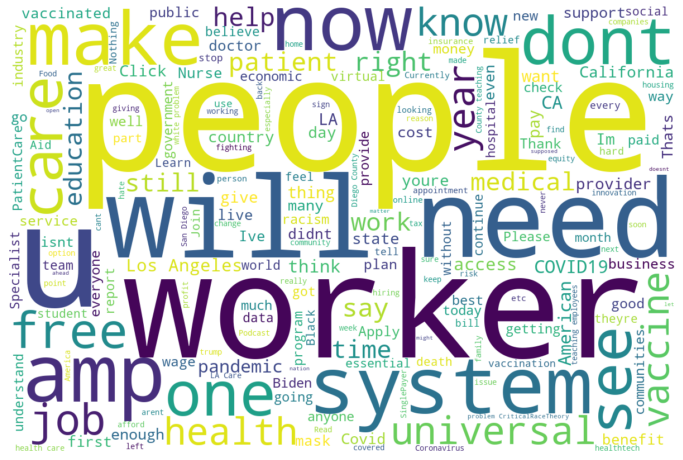

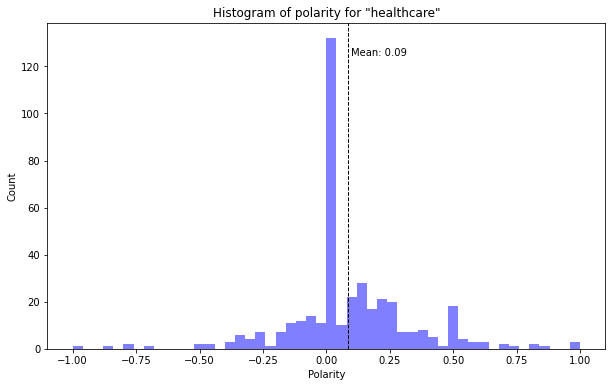

'Top 10 negative tweets'

,clean_text,polarity
245,Liberals out to get you with guaranteed covered healthcare and 15hr minimum wage How horrible,-1
327,The horrific winter storms in Texas make it even clearer than before housing is healthcareThe AmericanRescuePlan delivers the eviction protections and rental assistance millions of people desperately needPass it now,-0.875
70,I hate the healthcare system in America smh,-0.8
94,Healthcare in the US is stupid Stupid af,-0.8
198,happyvalley 1 In a forprofit healthcare system the profit is the focus not healthcare And when insurance is tied to employment it makes for a disastrous system,-0.7
95,What To Do If You Think Your Child Is Mentally Ill Behavior HEALTH healthcare mentalhealth,-0.5
154,And senators get unlimited lunch and bathroom breaks And vacations and healthcare And police escorts to the airport when theyre abandoning their states to the results of years of corrupt climate change denialism,-0.5
23,I injured my toe over the weekend and had to go to FOUR urgent care clinics before I finally found one that could do Xrays I have a fracture and now I have to go to a podiatrist ASAP to get a steroid injection for swelling I hate being clumsy and I hate our healthcare system,-0.475
111,Im sorry thats happening to your wife That is infuriating My dad and sister are in healthcare and see that happen too often Its not ok,-0.45
49,Why r u wasting energy on her she is NOT QUALIFIED Instead of Biden spending energy fighting 4 her worthless nom he should b fighting 4 15hr min wage student loan debt universal healthcare or I dunno 2000 nonmeanstested checks as promised We r getting none of that,-0.4


'Top 10 positive tweets'

,clean_text,polarity
281,Did you know that SWC has a highly successful telemedicine program for wound care Telehealth has been shown to reduce healthcare costs improve patient outreach and health outcomes and change the way providers treat their patients Learn more today,0.625
178,To lead you need an experienced and dedicated person who understands our healthcare system and how it can best support all AmericansAnd found the best choice in He served California with honor and I know hell do the same on the national stage,0.7
255,Pup Hmm lol go look all the money he has to raise for ALL his policies You are just picking healthcare Lol there is more to it than just heal care,0.7
6,Lmao youre good I knew what you meant And yes we do need healthcare for all,0.7375
213,Do you think 350 per month keeps you out of work Lol lol lol lol What do you think 350 gets you Wait are you the dude who told people not to buy iPhones so they can have healthcare,0.8
294,Happy birthday SamThe fastest growing population of individuals experiencing homelessness is aging adults This is why is building initiatives to address healthcare needs for homeless seniors,0.8
249,We would have good healthcare in Cali Where do I sign,0.875
362,Innovation will continue for healthtech as policies are enacted to provide the best healthcare for all patientsRDEE RADIOLOGEX medicalimaging hipaa userauthentication healthit medtech saas baas patientdata enterprisei GetRDEE,1
202,So Burr is saying members of Congress dont become experts on Healthcare bc theyre on a committee or are in Congress as a means to say Becerra is unqualifiedSenator Burr who is a member of Congress on the Health committee is passing judgment on whats best for the,1
201,Healthcare System amp who is best qualified,1


In [40]:
find_tweets(q='healthcare',place='90048')

Author of this notebook: Frida Barragan

Collaborator: Keven Michel - Twitter analysis of a downtown LA area.